In [15]:
# STEP 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# STEP 2: Load the dataset
file_path = '/content/2310007901_databaseLoadingData.csv'
df = pd.read_csv(file_path)

# STEP 3: Convert REF_DATE to datetime and sort values
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
df = df.sort_values(by='REF_DATE')

# STEP 4: Pivot the dataset to get a time-series structure
pivot_df = df.pivot_table(index='REF_DATE',
                          columns='Operational and financial statistics',
                          values='VALUE',
                          aggfunc='sum')


# STEP 5: Merge with additional information Yield, GDP, Dummy, RPK
external_file_path = '/content/Data_Airline_to_Py.xlsx'
external_df = pd.read_excel(external_file_path)

external_df['DateYM'] = pd.to_datetime(external_df['DateYM'])

external_df.rename(columns={'DateYM': 'REF_DATE'}, inplace=True)

merged_df = pivot_df.reset_index().merge(external_df, on='REF_DATE', how='inner')


# STEP 6: Display the first rows of the structured dataset
print("Initial Columns:")
print(list(merged_df.columns))
print("\Data General Information:")
merged_df.info()
merged_df.head()


Initial Columns:
['REF_DATE', 'Available seat-kilometres', 'Hours flown', 'Load factor', 'Passenger-kilometres', 'Passengers', 'Total operating revenues', 'Turbo fuel consumed', 'Rpks', 'GDP', 'Yield', 'Dummy Vacations']
\Data General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   REF_DATE                   123 non-null    datetime64[ns]
 1   Available seat-kilometres  123 non-null    float64       
 2   Hours flown                123 non-null    float64       
 3   Load factor                123 non-null    float64       
 4   Passenger-kilometres       123 non-null    float64       
 5   Passengers                 123 non-null    float64       
 6   Total operating revenues   123 non-null    float64       
 7   Turbo fuel consumed        123 non-null    float64       
 8   Rpks        

,REF_DATE,Available seat-kilometres,Hours flown,Load factor,Passenger-kilometres,Passengers,Total operating revenues,Turbo fuel consumed,Rpks,GDP,Yield,Dummy Vacations
0,2015-01-01,16896129.0,169.0,81.5,13774656.0,5507.0,1542061.0,540328.0,13774656,1911198,0.111949,0
1,2015-02-01,15483183.0,155.0,83.4,12918782.0,5333.0,1472896.0,496476.0,12918782,1909731,0.114012,0
2,2015-03-01,17900009.0,174.0,83.6,14960327.0,6073.0,1701527.0,568647.0,14960327,1907789,0.113736,1
3,2015-04-01,16298759.0,159.0,83.1,13548366.0,5601.0,1511966.0,519263.0,13548366,1906000,0.111598,0
4,2015-05-01,16612457.0,160.0,82.1,13642565.0,5421.0,1532594.0,529827.0,13642565,1902034,0.112339,0


In [16]:
# Selected variables relevant to PESTEL framework
selected_columns = [
    'Passengers',                        # Social
    'Passenger-kilometres',              # Economic
    'Available seat-kilometres',         # Economic/Technological
    'Load factor',                       # Technological/Economic
    'Turbo fuel consumed',               # Environmental
    'Total operating revenues',          # Economic
    'Hours flown',                        # Technological
    'Yield',                              # Technological
    'GDP',                                # Economic/Political
    'Dummy Vacations'                    # Social
]

# Filter dataset to keep only selected PESTEL variables
df_selected = merged_df[selected_columns]

# Check for missing values
missing_summary = df_selected.isnull().sum()

# Validate data types
data_types = df_selected.dtypes

# Check for duplicates in the date index (should be none)
duplicate_check = df_selected.index.duplicated().sum()

# Display summary
print("Missing Values by Column:\n", missing_summary)
print("\nData Types:\n", data_types)
print(f"\nDuplicate Dates: {duplicate_check}")


Missing Values by Column:
 Passengers                   0
Passenger-kilometres         0
Available seat-kilometres    0
Load factor                  0
Turbo fuel consumed          0
Total operating revenues     0
Hours flown                  0
Yield                        0
GDP                          0
Dummy Vacations              0
dtype: int64

Data Types:
 Passengers                   float64
Passenger-kilometres         float64
Available seat-kilometres    float64
Load factor                  float64
Turbo fuel consumed          float64
Total operating revenues     float64
Hours flown                  float64
Yield                        float64
GDP                            int64
Dummy Vacations                int64
dtype: object

Duplicate Dates: 0


In [17]:
# Calculate mode (first mode in case of multiple)
mode_values = df_selected.mode().iloc[0]

# Calculate range (max - min)
range_values = df_selected.max() - df_selected.min()

# Generate full descriptive statistics
descriptive_stats = df_selected.describe().T  # Transpose for readability
descriptive_stats['mode'] = mode_values
descriptive_stats['range'] = range_values

# Display results
print("Extended Descriptive Statistics for Airline Operational Variables:\n")
display(descriptive_stats.round(2))  # Round for neat output

Extended Descriptive Statistics for Airline Operational Variables:



,count,mean,std,min,25%,50%,75%,max,mode,range
Passengers,123.0,5594.87,2188.72,213.0,5377.00,6330.00,6920.50,8463.00,6946.0,8250.00
Passenger-kilometres,123.0,14669291.89,6216853.82,436596.0,13367258.00,16492796.00,18637898.50,24047825.00,436596.0,23611229.00
Available seat-kilometres,123.0,17846664.47,6660563.31,1342008.0,16657456.50,19778249.00,22091453.50,26901222.00,1342008.0,25559214.00
Load factor,123.0,77.31,14.35,26.0,80.35,82.40,84.45,89.80,83.6,63.80
Turbo fuel consumed,123.0,532321.26,183690.03,72362.0,501947.50,579869.00,641011.00,793608.00,72362.0,721246.00
Total operating revenues,123.0,1725803.03,705381.35,180885.0,1475675.50,1801992.00,2189299.00,2977253.00,180885.0,2796368.00
Hours flown,123.0,152.28,53.51,13.0,152.00,171.00,184.50,217.00,174.0,204.00
Yield,123.0,0.13,0.06,0.1,0.11,0.12,0.13,0.55,0.1,0.45
GDP,123.0,2083117.08,127546.58,1757625.0,1983879.50,2073003.00,2207278.50,2295514.00,2097348.0,537889.00
Dummy Vacations,123.0,0.33,0.47,0.0,0.00,0.00,1.00,1.00,0.0,1.00


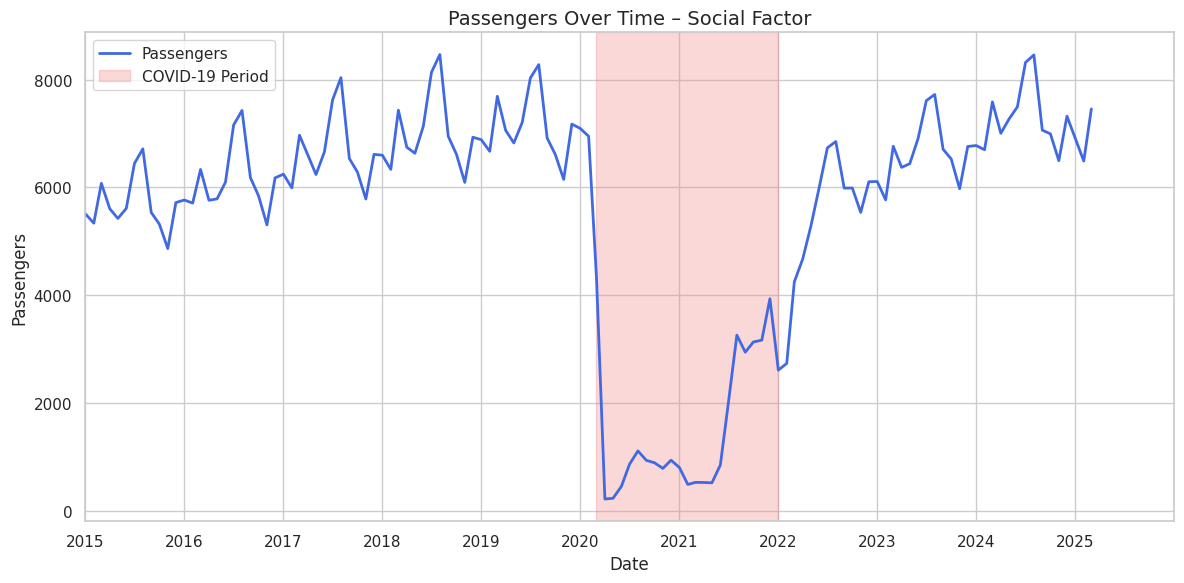

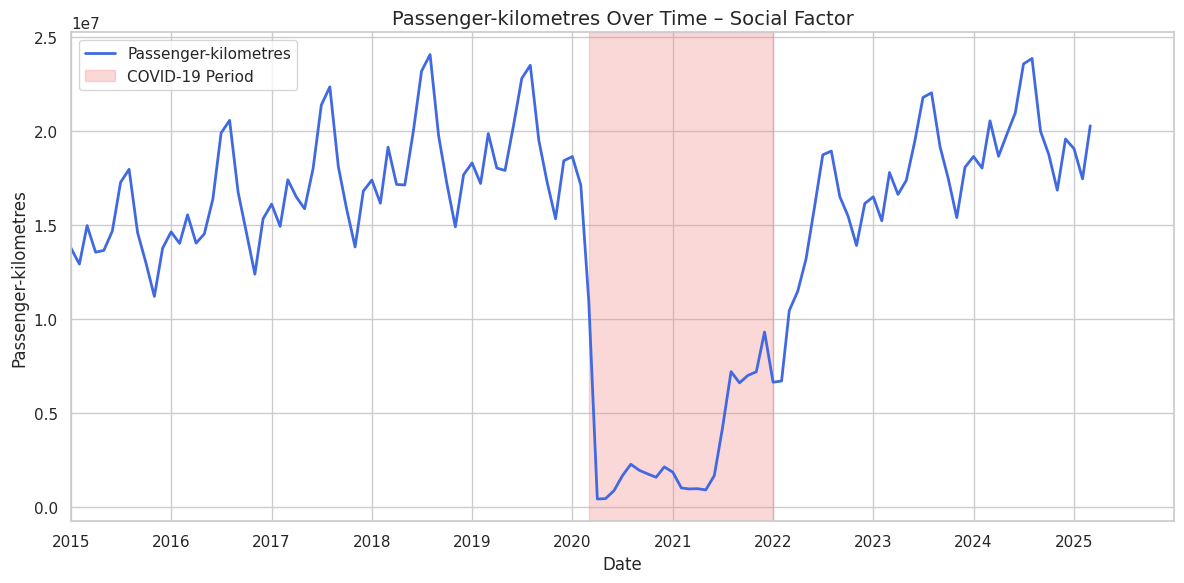

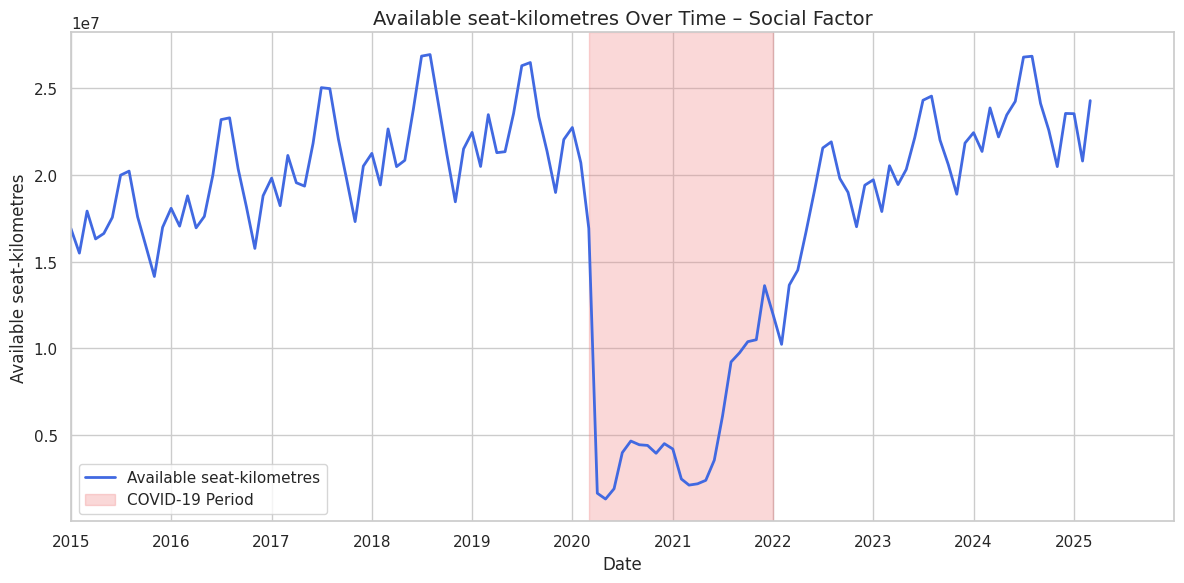

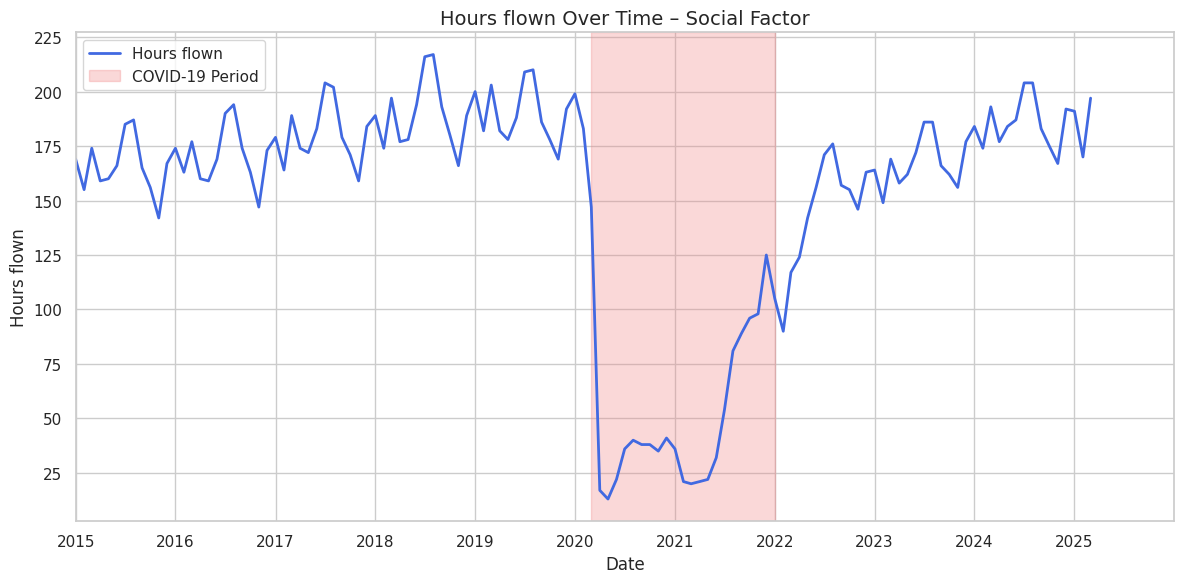

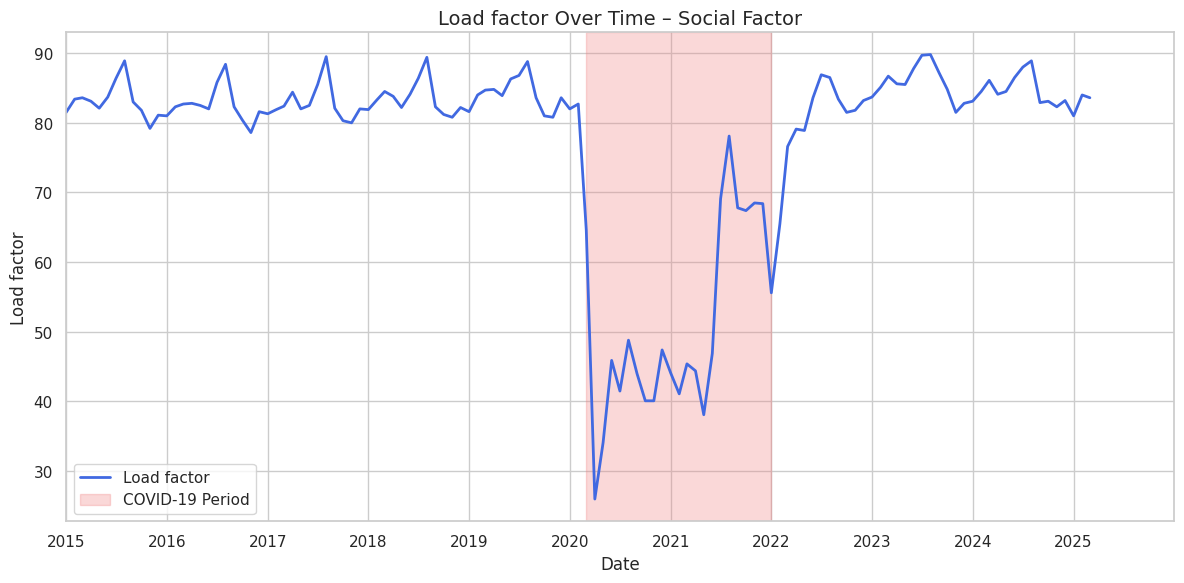

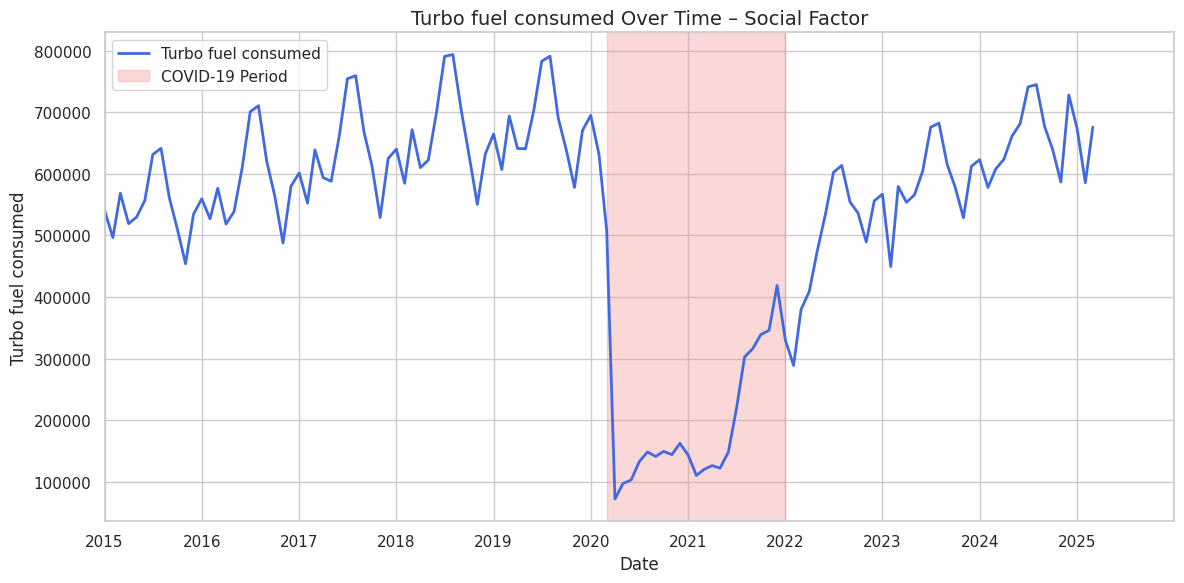

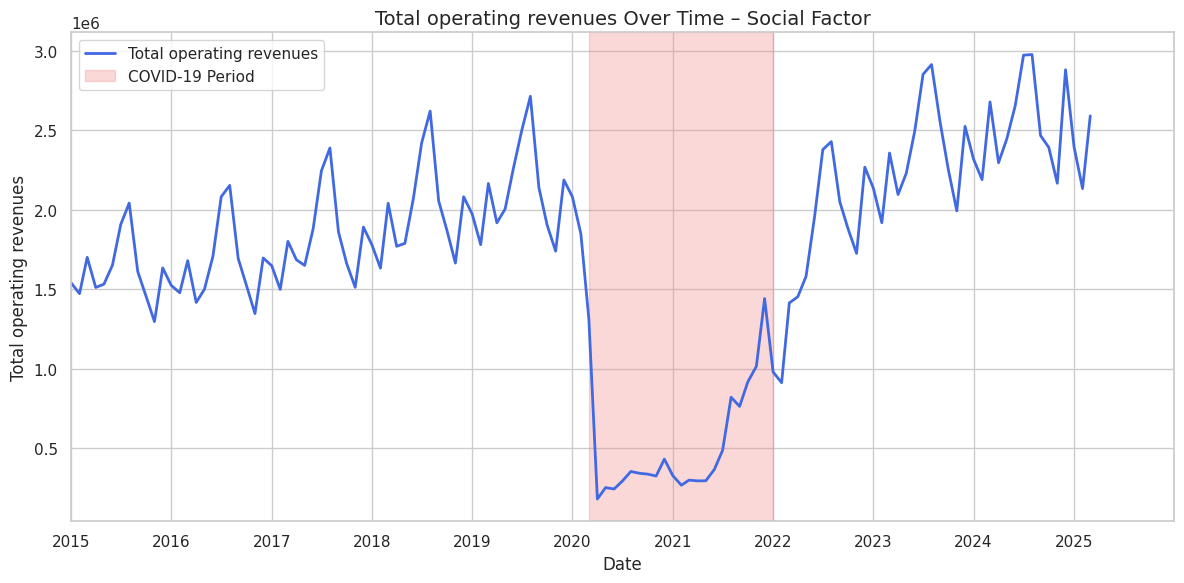

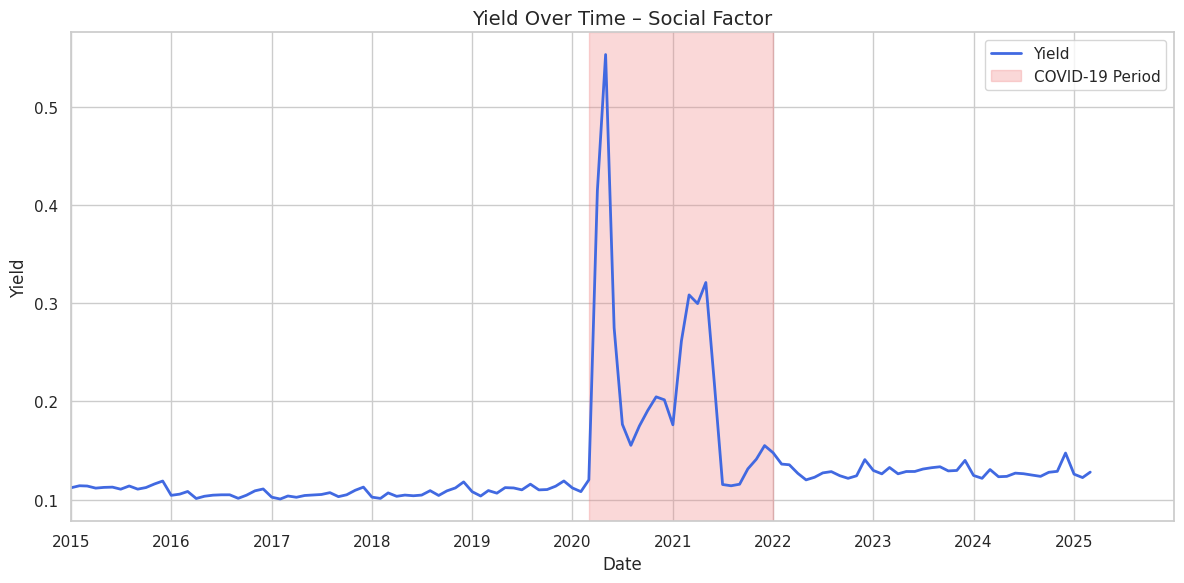

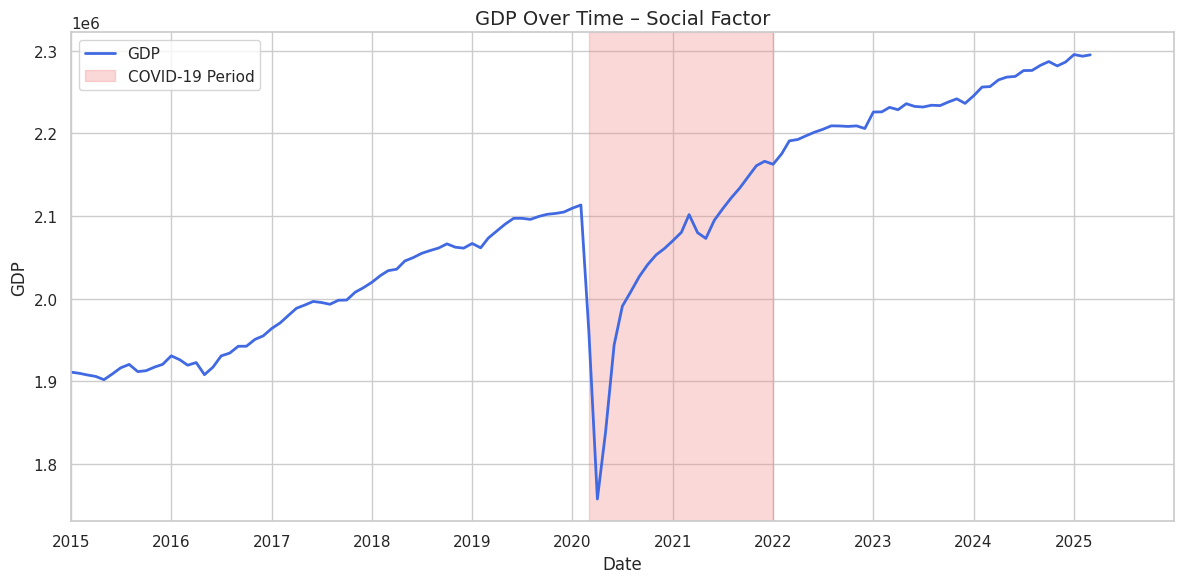

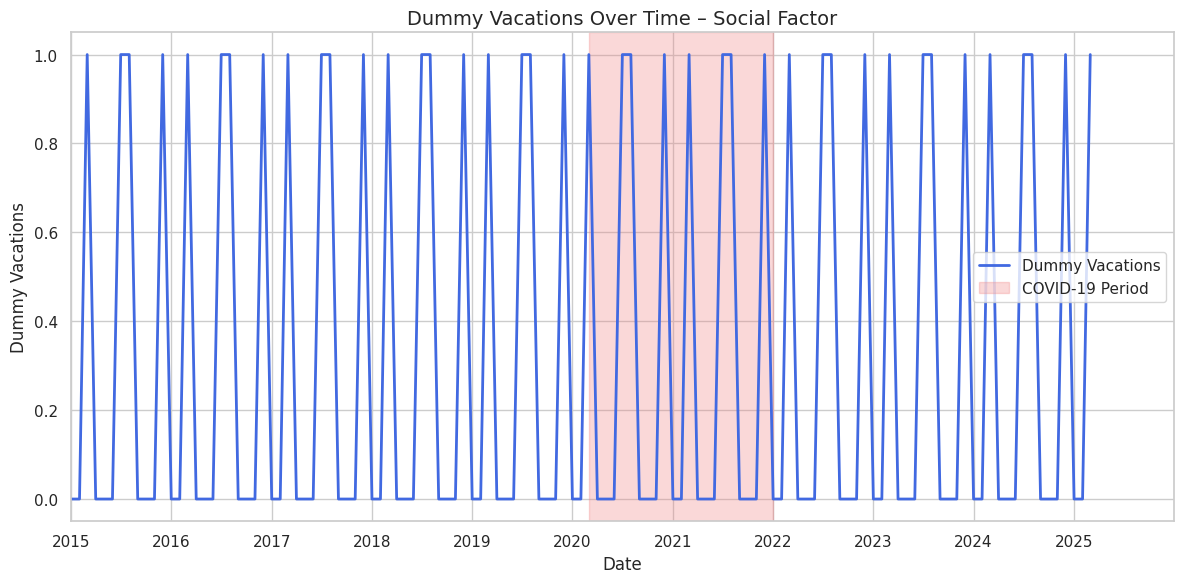

In [22]:
import seaborn as sns

# Define COVID-19 impact window
covid_start = pd.to_datetime("2020-03-01")
covid_end = pd.to_datetime("2021-12-31")

variables = {
    'Passengers': 'Social',
    'Passenger-kilometres': 'Social',
    'Available seat-kilometres': 'Technological / Economic',
    'Hours flown': 'Technological / Economic',
    'Load factor': 'Technological / Economic',
    'Turbo fuel consumed': 'Environmental',
    'Total operating revenues': 'Economic',
    'Yield':'Technological',
    'GDP':'Economic/Political',
    'Dummy Vacations':'Social'}

sns.set(style="whitegrid")

for var, label in variables.items():
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df['REF_DATE'], merged_df[var], label=var, color='royalblue', linewidth=2)
    plt.axvspan(covid_start, covid_end, color='lightcoral', alpha=0.3, label='COVID-19 Period')
    plt.xlim(pd.to_datetime("2015-01-01"), pd.to_datetime("2025-12-31"))
    plt.title(f"{var} Over Time – {dimension} Factor", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()